## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:20: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


## Cargar los datos de NHANES

In [6]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type='snake') # Janitor
)

nhanes_raw_df.shape

(8366, 197)

In [8]:
nhanes_raw_df.columns

Index(['general_health_condition', 'ever_breastfed_or_fed_breastmilk',
       'age_stopped_breastfeedingdays', 'age_first_fed_formuladays',
       'age_stopped_receiving_formuladays', 'age_started_other_foodbeverage',
       'age_first_fed_milkdays', 'type_of_milk_first_fed_whole_milk',
       'type_of_milk_first_fed2_milk', 'type_of_milk_first_fed1_milk',
       ...
       'days_smoked_cigs_during_past30_days',
       'avg_cigarettesday_during_past30_days', 'tried_to_quit_smoking',
       'times_stopped_smoking_cigarettes',
       'how_long_were_you_able_to_stop_smoking',
       'unit_of_measure_dayweekmonthyear_2_smq',
       'current_selfreported_height_inches',
       'current_selfreported_weight_pounds',
       'tried_to_lose_weight_in_past_year',
       'times_lost10_lbs_or_more_to_lose_weight'],
      dtype='object', length=197)

## Procesar los datos de NHANES

In [21]:
nhanes_df = (
    nhanes_raw_df
    .select_columns(
        'general_health_condition',
        'age_in_years_at_screening',
        'gender',
        'current_selfreported_height_inches',
        'current_selfreported_weight_pounds',
        'doctor_told_you_have_diabetes',
        '60_sec_pulse30_sec_pulse2',
        'total_cholesterol_mgdl',
    )
    .rename_columns(
        {
            'age_in_years_at_screening': 'age',
            'current_selfreported_height_inches': 'height',
            'current_selfreported_weight_pounds': 'weight',
            'doctor_told_you_have_diabetes': 'diabetes',
            '60_sec_pulse30_sec_pulse2': 'pulse',
            'total_cholesterol_mgdl': 'cholesterol',
        }
    )
    .replace(
        {
            'height': {9999: np.nan, 7777: np.nan},
            'weight': {9999: np.nan, 7777: np.nan},
            'diabetes': {'Borderline': np.nan},
        }
    )
    .missing.sort_variables_by_missingness()
    .dropna(
        subset=['diabetes'],
        how='any',
    )
    .transform_column( # Janitor
        column_name='diabetes',
        function=lambda s: s.astype('int'),
        elementwise = False
    )

)

nhanes_df

,height,weight,general_health_condition,cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Female
93704.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Male
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,4.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


## Visualizar los valores faltantes

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

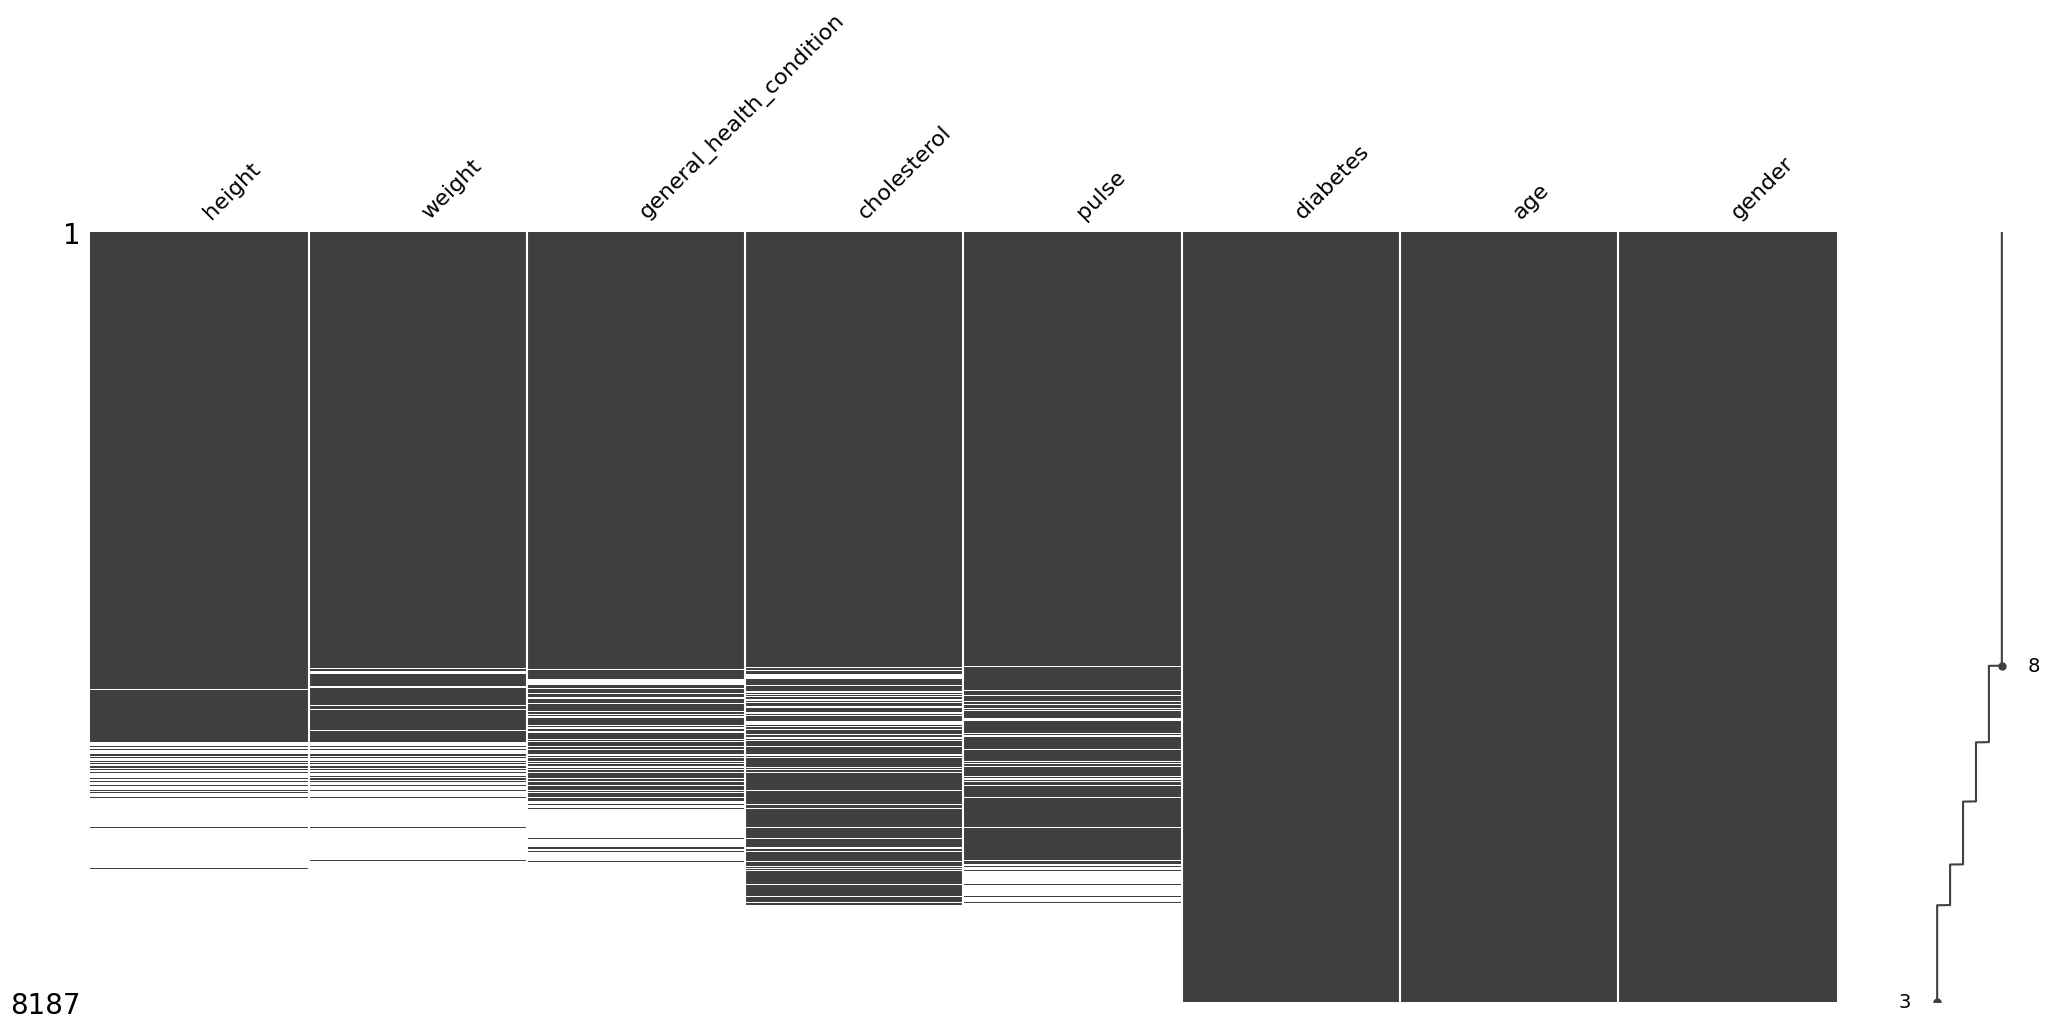

In [30]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort='descending')
)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

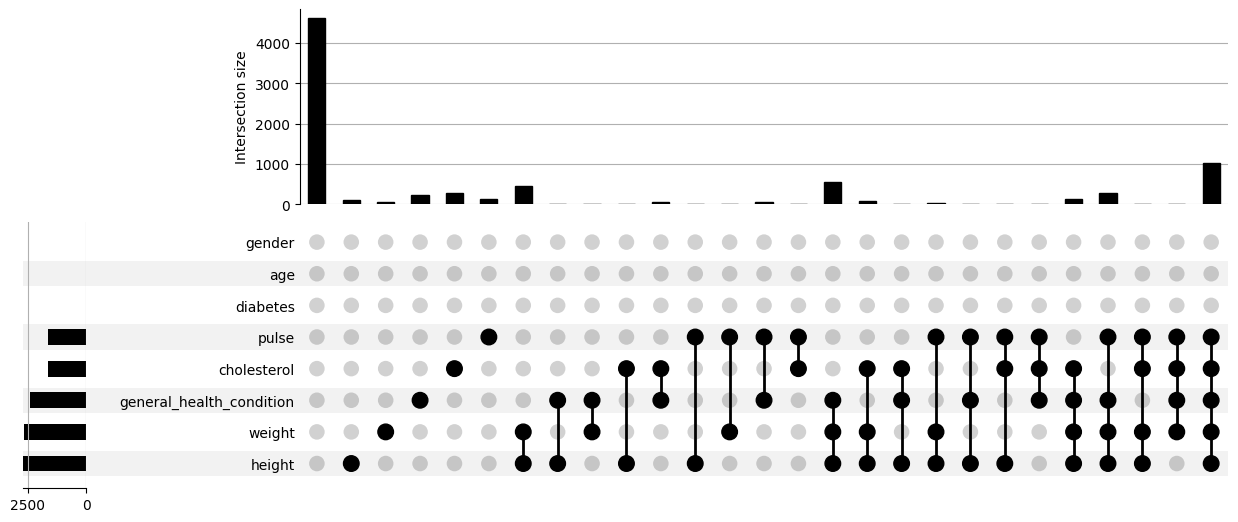

In [32]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

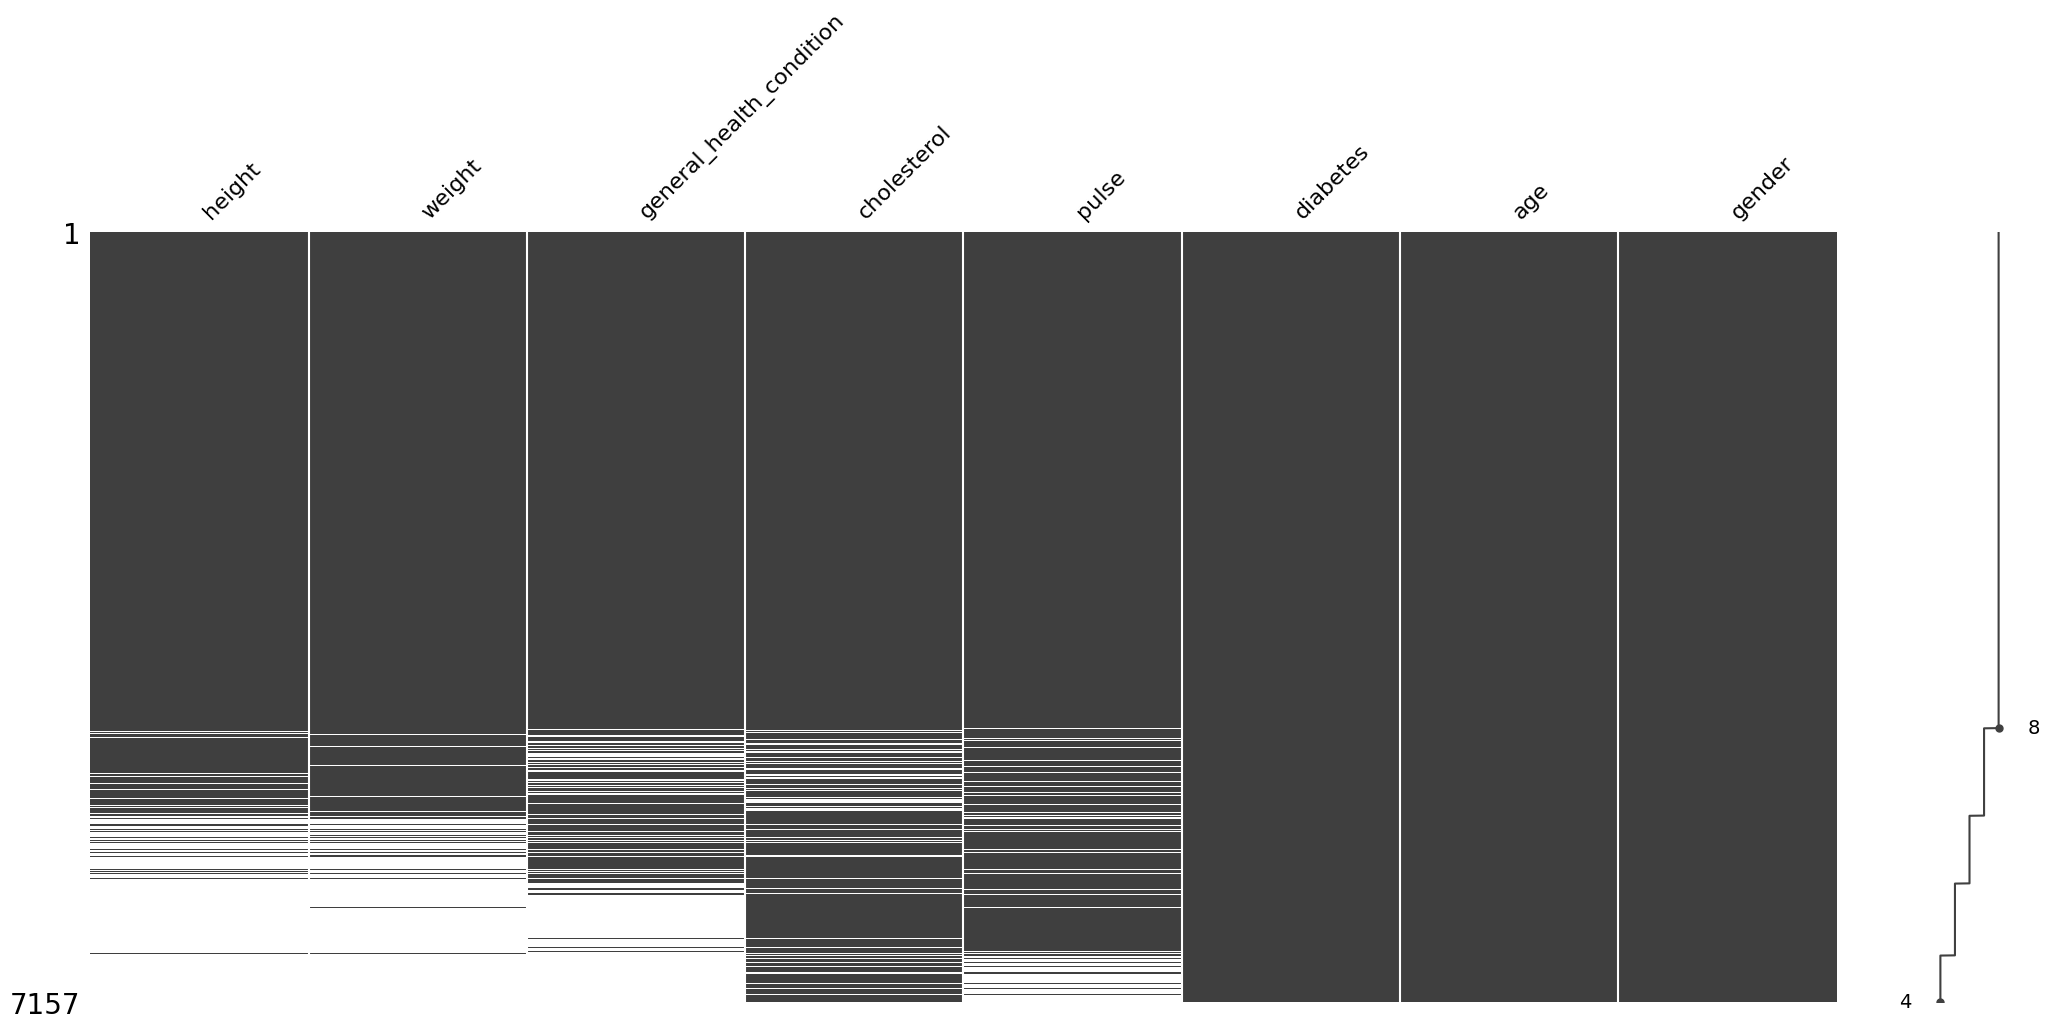

In [35]:
(
    nhanes_df
    .dropna(
        subset=['pulse', 'cholesterol', 'height', 'weight', 'general_health_condition'],
        how='all', # solo se borran las filas que tengan todos los valores nulos
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort='descending')
)

## Eliminar valores faltantes

In [36]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset=['pulse', 'cholesterol', 'height',
                'weight', 'general_health_condition'],
        how='all',  # solo se borran las filas que tengan todos los valores nulos
    )
    .missing.sort_variables_by_missingness()
)

nhanes_df.shape

(7157, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>